In [2]:
# Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
titanic = pd.read_csv('titanic.csv')

In [20]:
# Visualizacion del Dataframe
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [21]:
# Eliminamos las columnas que no nos interesann
titanic.drop(
    ['Name', 'Fare'], 
    axis=1,
    inplace=True)

In [22]:
# Renombramos las columnas Siblings/Spouses Aboard	y Parents/Children Aboard por SibSp y ParCh 
titanic.columns = ['sobrevive', 'clase_social', 'sexo', 'años', 'esposos_hermanos', 'padres_hijos']
titanic.head()

,sobrevive,clase_social,sexo,años,esposos_hermanos,padres_hijos
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [23]:
# Cambiamos los tipos de datos de Sex
titanic = pd.get_dummies(titanic, columns=['sexo'], drop_first=True)

In [24]:
# Renombramos columna Sex_male a Sex
titanic.rename(columns={'sexo_masculino':'sexo'},inplace=True)

In [25]:
# Vemos la proporcion del a variable objetivo
titanic.sobrevive.value_counts(normalize=True)

sobrevive
0    0.614431
1    0.385569
Name: proportion, dtype: float64

In [28]:
# importamos libreria para balancear los datos
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [31]:
# Separamos en X e y
X_titanic = titanic.drop('sobrevive', axis=1)
y_titanic = titanic.sobrevive

In [32]:
# Balanceamos los datos
X_over_titanic, y_over_titanic  = undersample.fit_resample(X_titanic,y_titanic)
y_over_titanic.value_counts(normalize=True)

sobrevive
0    0.5
1    0.5
Name: proportion, dtype: float64

In [33]:
# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

# 30% para test y 70% para train
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_over_titanic,y_over_titanic, test_size=0.30, random_state=42)

In [34]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_titanic, y_train_titanic)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411


In [35]:
# Modelo decision tree con parametros optimizados
best_clf = grid_search.best_estimator_

In [36]:
# Predecimos Y
y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)

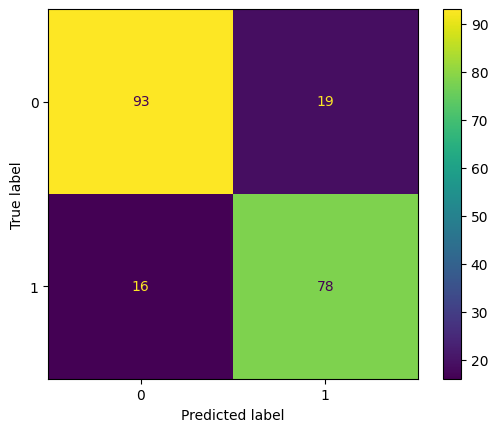

In [37]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test_titanic,y_test_pred_titanic,labels=best_clf.classes_)
ConfusionMatrixDisplay(cm, display_labels=best_clf.classes_).plot()

In [38]:
# Calculo de las predicciones en Train y test
y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

In [39]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train_titanic,y_train_pred_titanic))
print('El accuracy en test es:', accuracy_score(y_test_titanic,y_test_pred_titanic))

El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8300970873786407


In [40]:
feature_scores_titanic = pd.DataFrame(pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train_titanic.columns).sort_values(ascending=False)).T

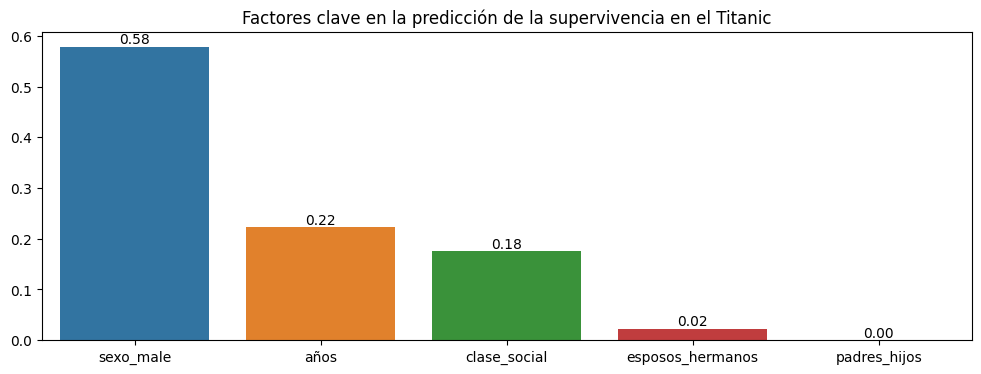

In [41]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()